# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Analysis
(1) The temperature at the Southern Hemisphere seems more favorable and can be attributed to the presence of more aquatic habitat than terrestial habitat
(2) There is also a correlation between Temperature and Latitude. As latitude moves away from equator, temperature decreases.
(3) Wind speed is controlled by other factors other than latitude. 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [145]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [146]:
# save config information.
url ="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

In [147]:
new_city=[]
lat=[]         
lng=[]           
max_temp=[]    
humidity =[]     
cloudiness =[] 
wind_speed =[]   
country =[]      
date  =[]   
index_counter=0
set_counter=1

query_url=(f"{url}appid={weather_api_key}&units={units}&q=")
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=36d27378545f7daafa9d3ff4e9ef2e7a&units=imperial&q='

In [148]:
print(f"Beginning Data Retrieval")
print(f"------------------------")

for city in cities:
    try:
        time.sleep(1)

        response=requests.get(query_url +city)
        json_response=response.json()
        #print(json.dumps(json_response, indent=4, sort_keys=True))
        new_city.append(json_response["name"])
        lat.append(json_response["coord"]["lat"])
        lng.append(json_response["coord"]["lon"])
        max_temp.append(json_response["main"]["temp_max"])
        humidity.append(json_response["main"]["humidity"])
        cloudiness.append(json_response["clouds"]["all"])
        wind_speed.append(json_response["wind"]["speed"])
        country.append(json_response["sys"]["country"])
        date.append(json_response["dt"])
        if index_counter>49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
        
        print(f"Processing {index_counter} of set {set_counter}:{city}")
    except KeyError:
        print("Another one!")
print(f"-------------------------------")
print(f"Ending Data Retrieval")

Beginning Data Retrieval
------------------------
Processing 1 of set 1:khatanga
Processing 2 of set 1:mao
Processing 3 of set 1:asau
Processing 4 of set 1:broome
Processing 5 of set 1:rikitea
Processing 6 of set 1:balikpapan
Processing 7 of set 1:codrington
Processing 8 of set 1:punta arenas
Processing 9 of set 1:bluff
Processing 10 of set 1:iqaluit
Processing 11 of set 1:busselton
Processing 12 of set 1:atuona
Processing 13 of set 1:cape town
Processing 14 of set 1:new norfolk
Processing 15 of set 1:jamestown
Processing 16 of set 1:hofn
Processing 17 of set 1:kodiak
Processing 18 of set 1:provideniya
Processing 19 of set 1:tenenkou
Processing 20 of set 1:kapaa
Processing 21 of set 1:hamilton
Processing 22 of set 1:muzhi
Processing 23 of set 1:victoria
Processing 24 of set 1:port alfred
Processing 25 of set 1:hithadhoo
Processing 26 of set 1:mahebourg
Another one!
Processing 27 of set 1:rimbey
Processing 28 of set 1:barrow
Processing 29 of set 1:mar del plata
Processing 30 of set 1:kr

Processing 42 of set 5:pimentel
Processing 43 of set 5:rio gallegos
Processing 44 of set 5:puerto carreno
Processing 45 of set 5:mahajanga
Processing 46 of set 5:bar harbor
Another one!
Processing 47 of set 5:fort nelson
Processing 48 of set 5:corinto
Processing 49 of set 5:la ronge
Processing 50 of set 5:jutai
Processing 0 of set 6:watsa
Processing 1 of set 6:roatan
Processing 2 of set 6:milazzo
Processing 3 of set 6:miles city
Processing 4 of set 6:sisimiut
Processing 5 of set 6:los llanos de aridane
Processing 6 of set 6:kasongo-lunda
Processing 7 of set 6:berlevag
Processing 8 of set 6:trinidad
Processing 9 of set 6:baghdad
Processing 10 of set 6:sakakah
Processing 11 of set 6:nuuk
Processing 12 of set 6:wanning
Processing 13 of set 6:amazar
Another one!
Processing 14 of set 6:denpasar
Processing 15 of set 6:talas
Processing 16 of set 6:kaohsiung
Processing 17 of set 6:axim
Processing 18 of set 6:boguchany
Processing 19 of set 6:mount isa
Processing 20 of set 6:nanortalik
Another o

Processing 35 of set 10:morros
Processing 36 of set 10:nevel
Processing 37 of set 10:katsina
Processing 38 of set 10:kaeo
Processing 39 of set 10:north platte
Processing 40 of set 10:canutama
Processing 41 of set 10:margate
Processing 42 of set 10:poum
Processing 43 of set 10:lerwick
Processing 44 of set 10:rameswaram
Processing 45 of set 10:matay
Processing 46 of set 10:vanimo
Processing 47 of set 10:aitape
Another one!
Processing 48 of set 10:naryan-mar
Processing 49 of set 10:awbari
Another one!
Processing 50 of set 10:bougouni
Processing 0 of set 11:lanzhou
Processing 1 of set 11:ancud
Processing 2 of set 11:huacho
Processing 3 of set 11:eloszallas
Processing 4 of set 11:luino
Processing 5 of set 11:oktyabrskiy
Processing 6 of set 11:hervey bay
Processing 7 of set 11:minot
Processing 8 of set 11:medford
Processing 9 of set 11:cortes
Processing 10 of set 11:shawville
Processing 11 of set 11:tiznit
Processing 12 of set 11:nizhniy kuranakh
Processing 13 of set 11:chepo
Processing 14 o

In [149]:
new_weather_df=pd.DataFrame({"City":new_city,
                           "Lat":lat,
                           "Lng":lng,
                           "Max Temp":max_temp,
                           "Humidity":humidity,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed,
                           "Country":country,
                           "Date":date})
new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.97,102.50,52.03,56,59,6.29,RU,1597117755
1,Mahon,39.89,4.27,75.20,83,5,5.82,ES,1597117755
2,Asău,46.43,26.40,60.01,87,0,2.73,RO,1597117756
3,Broome,42.25,-75.83,71.01,73,1,4.70,US,1597117756
4,Rikitea,-23.12,-134.97,70.05,75,65,22.93,PF,1597117756


In [150]:
new_weather_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [151]:
new_weather_df.to_csv("../output_data/weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [152]:
new_weather2_df=new_weather_df.loc[new_weather_df["Humidity"]<=100]
new_weather2_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.97,102.50,52.03,56,59,6.29,RU,1597117755
1,Mahon,39.89,4.27,75.20,83,5,5.82,ES,1597117755
2,Asău,46.43,26.40,60.01,87,0,2.73,RO,1597117756
3,Broome,42.25,-75.83,71.01,73,1,4.70,US,1597117756
4,Rikitea,-23.12,-134.97,70.05,75,65,22.93,PF,1597117756
...,...,...,...,...,...,...,...,...,...
567,Dali,25.70,100.18,67.10,80,100,5.61,CN,1597117794
568,Izvoru Berheciului,46.58,27.22,61.00,100,25,3.36,RO,1597117794
569,Pasco,28.29,-82.42,80.01,86,34,3.89,US,1597117794
570,Yangjiang,21.85,111.97,91.00,64,100,10.80,CN,1597117794


In [153]:
new_weather2_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.00000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,22.211783,15.91500,68.296031,72.188811,48.293706,8.046259,1.597118e+09
std,33.592282,89.34422,13.589859,18.713510,39.216911,4.926432,7.447239e+01
min,-54.800000,-179.17000,30.200000,3.000000,0.000000,0.650000,1.597117e+09
25%,-5.135000,-62.30000,59.000000,62.000000,4.750000,4.470000,1.597118e+09
50%,26.815000,20.16000,69.530000,76.500000,41.000000,7.250000,1.597118e+09
75%,51.267500,92.92500,78.420000,87.000000,90.000000,10.830000,1.597118e+09
max,78.220000,179.32000,97.000000,100.000000,100.000000,31.120000,1.597118e+09


In [154]:
#  Get the indices of cities that have humidity over 100%.
cities_indicies=new_weather_df.loc[new_weather_df["Humidity"]>100].index
cities_indicies


Int64Index([], dtype='int64')

In [155]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

outliers_indexes=new_weather_df.loc[(new_weather_df["Humidity"]<humidity_lower_bound) | (new_weather_df["Humidity"]>humidity_upper_bound)].index
outliers_indexes





clean_city_data = new_weather_df.drop(outliers_indexes,inplace=False)
clean_city_data
fresh_data=clean_city_data.sort_values("Humidity", ascending=False)
fresh_data


24.5 and 124.5 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
95,Grindavik,63.84,-22.43,51.80,100,90,19.46,IS,1597117762
224,Laas,46.62,10.70,57.20,100,40,3.36,IT,1597117770
82,Bethel,41.37,-73.41,72.00,100,1,3.49,US,1597117480
72,Yellowknife,62.46,-114.35,63.00,100,75,3.36,CA,1597117760
87,Klaksvík,62.23,-6.59,53.60,100,45,8.05,FO,1597117761
...,...,...,...,...,...,...,...,...,...
221,Adrar,20.50,-10.07,91.56,30,4,7.70,MR,1597117770
191,Zhangjiakou,40.81,114.88,84.49,30,18,1.01,CN,1597117768
328,Midland,32.00,-102.08,91.40,29,0,17.22,US,1597117496
385,Teya,60.38,92.63,81.66,28,0,4.68,RU,1597117781


In [207]:
# Extract relevant fields from the data frame
extract_data=clean_city_data[["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
extract_data


,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,71.97,52.03,56,59,6.29
1,39.89,75.20,83,5,5.82
2,46.43,60.01,87,0,2.73
3,42.25,71.01,73,1,4.70
4,-23.12,70.05,75,65,22.93
...,...,...,...,...,...
567,25.70,67.10,80,100,5.61
568,46.58,61.00,100,25,3.36
569,28.29,80.01,86,34,3.89
570,21.85,91.00,64,100,10.80


In [208]:
# Export the City_Data into a csv
extract_data.to_csv("../output_data/extra.csv",index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

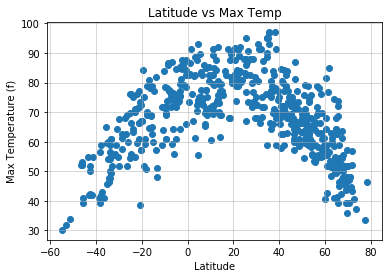

In [209]:
plt.scatter(extract_data['Lat'],extract_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title("Latitude vs Max Temp")

#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Max Temp.png")

plt.show()

## Latitude vs. Humidity Plot

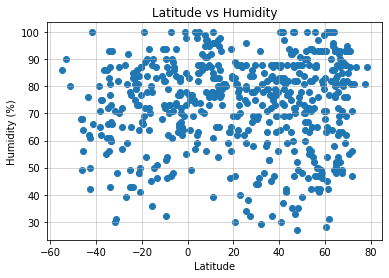

In [210]:
plt.scatter(extract_data['Lat'],extract_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

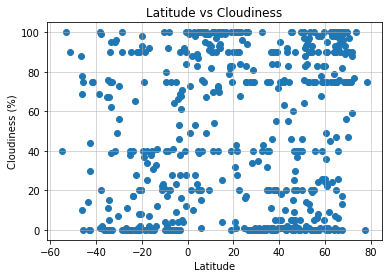

In [211]:
plt.scatter(extract_data['Lat'],extract_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

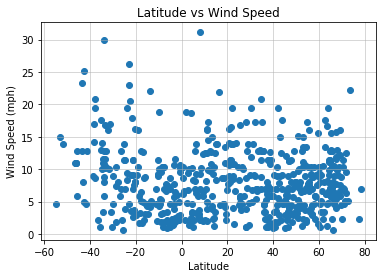

In [212]:
plt.scatter(extract_data['Lat'],extract_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Wind Speed.png")

plt.show()

## Linear Regression

In [213]:
northern_hemisphere=extract_data.loc[extract_data["Lat"]>=0]
#northern_hemisphere.sort_values("Max Temp", ascending=True)
northern_hemisphere

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,71.97,52.03,56,59,6.29
1,39.89,75.20,83,5,5.82
2,46.43,60.01,87,0,2.73
3,42.25,71.01,73,1,4.70
9,63.75,41.00,86,75,1.30
...,...,...,...,...,...
562,23.35,80.24,88,100,6.58
567,25.70,67.10,80,100,5.61
568,46.58,61.00,100,25,3.36
569,28.29,80.01,86,34,3.89


In [214]:
southern_hemisphere=extract_data.loc[clean_city_data["Lat"]<0]
#southern_hemisphere.sort_values("Max Temp", ascending=True)
southern_hemisphere

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
4,-23.12,70.05,75,65,22.93
5,-1.27,78.80,100,40,2.24
6,-38.27,56.46,71,100,14.18
7,-53.15,32.00,90,100,14.99
8,-46.60,52.00,68,88,11.01
...,...,...,...,...,...
563,-5.12,84.52,74,9,6.98
564,-20.93,38.70,50,0,3.71
565,-43.30,42.03,62,0,23.35
566,-17.08,64.60,94,92,1.63


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4933914607127037


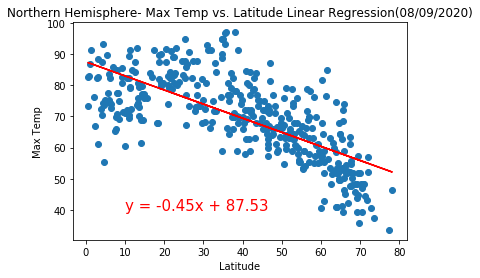

There is a moderate positive correlation between Max Temp and Latitude Linear Regression(Northern Hemisphere)


In [225]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression(08/09/2020)")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a moderate positive correlation between Max Temp and Latitude Linear Regression(Northern Hemisphere)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6162157084657056


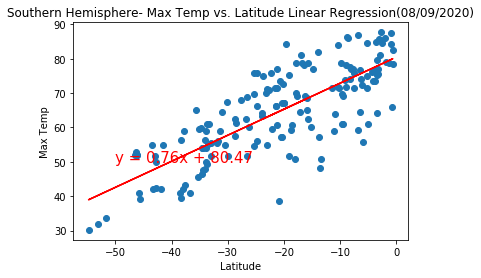

There is a moderate positive correlation between Max Temp and Latitude Linear Regression(Southern Hemisphere)


In [227]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere- Max Temp vs. Latitude Linear Regression(08/09/2020)")
plt.show()
plt.savefig("../Images/Sorthern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a moderate positive correlation between Max Temp and Latitude Linear Regression(Southern Hemisphere)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004008810141784869


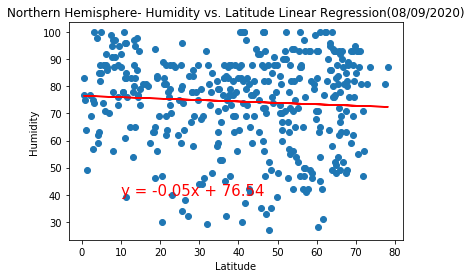

There is a weak positive correlation between Humidity and Latitude Linear Regression(Northern Hemisphere)


<Figure size 432x288 with 0 Axes>

In [228]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere- Humidity vs. Latitude Linear Regression(08/09/2020)")
plt.show()
%matplotlib inline
plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
print(f"There is a weak positive correlation between Humidity and Latitude Linear Regression(Northern Hemisphere)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01959677326613366


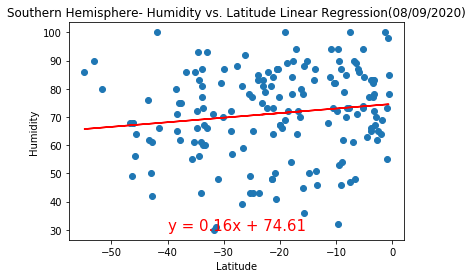

There is a weak positive correlation between Humidity and Latitude Linear Regression(Southern Hemisphere)


In [229]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere- Humidity vs. Latitude Linear Regression(08/09/2020)")
plt.show()
plt.savefig("../Images/Sorthern Hemisphere - Humidity vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a weak positive correlation between Humidity and Latitude Linear Regression(Southern Hemisphere)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004184141116264917


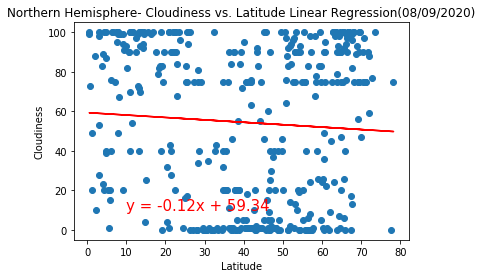

There is a weak positive correlation between Cloudiness and Latitude Linear Regression(Northern Hemisphere)


In [230]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere- Cloudiness vs. Latitude Linear Regression(08/09/2020)")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a weak positive correlation between Cloudiness and Latitude Linear Regression(Northern Hemisphere)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0077378663942837935


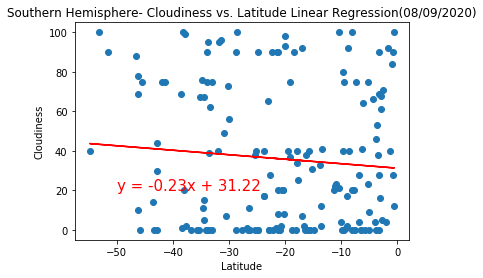

There is a weak positive correlation between Cloudiness and Latitude Linear Regression(Southern Hemisphere)


In [231]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere- Cloudiness vs. Latitude Linear Regression(08/09/2020)")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a weak positive correlation between Cloudiness and Latitude Linear Regression(Southern Hemisphere)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0005168284414110663


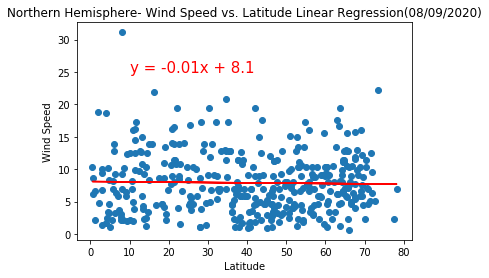

There is a weak positive correlation between Wind speed and Latitude Linear Regression(Northern Hemisphere)


In [232]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere- Wind Speed vs. Latitude Linear Regression(08/09/2020)")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a weak positive correlation between Wind speed and Latitude Linear Regression(Northern Hemisphere)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1703693458321285


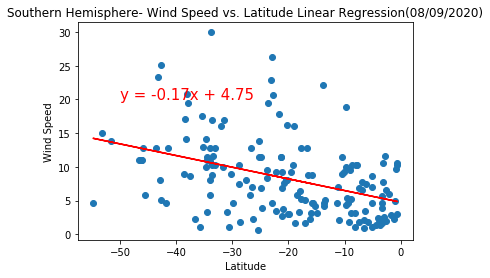

There is a weak positive correlation between Wind speed and Latitude Linear Regression(Southern Hemisphere)


In [233]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere- Wind Speed vs. Latitude Linear Regression(08/09/2020)")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a weak positive correlation between Wind speed and Latitude Linear Regression(Southern Hemisphere)")